<div style="background-color : white; border-radius: 15px; width: 93%; padding: 2em; color: black; font-family: Gill Sans, sans-serif;">
<h1 style ="text-align: center; color: black; font-family: Gill Sans, sans-serif;font-weight: 700;"> Test della Logistic Regression implementata su dataset ammissione college</h1>
<h2>Indice</h2>

<ol type="1">
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#intro">Modello implementato</a></li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#struttura">Preparazione dataset</a>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">2.1 Caricamento del dataset</li>
            <li style="padding-bottom: 0.3em;">2.2 Divisione del dataset in train e test set</li>
            <li style="padding-bottom: 0.3em;">2.3 Manipolazione dei dati</li>
            <li>2.4 Normalizzazione dei dati</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#grafici">Applicazione del modello</a>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">3.1 Allenamento del modello</li>
            <li>3.2 Risultati del modello allenato</li>
        </ul>
    </li>
    <li style="padding-top: 0.3em; padding-bottom: 0.3em;"><a href="#conclusioni">Valutazione del modello</a></li>
        <ul>
            <li style="padding-top: 0.3em; padding-bottom: 0.3em;">4.1 Metrica d'errore</li>
            <li style="padding-bottom: 0.3em;">4.2 Confusion Matrix</li>
            <li style="padding-bottom: 0.3em;">4.3 Curva precision e recall</li>
            <li>4.4 Curva ROC e AUC</li>
        </ul>
    </li>
</ol>
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 1. Modello implementato </h3></a>
</div>

In [158]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    print(W)
    return iter  

def prediction(W,X,Y):
    m = X.shape[0]
    h = hyp(X, W)
    Y_hat = h > 0.5
    accuracy = 1.0/m * np.sum(Y == Y_hat)
    return accuracy, Y_hat, h

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 2. Preparazione del dataset </h3></a>
    <h4 style="color:black"> 2.1 Caricamento del dataset </h4>
</div>

In [159]:
# Carico il dataset
path = './ex2data1.txt'
data = pd.read_csv(path, header=None, names=["Ex1","Ex2","classificazione"])

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.2 Divisione del dataset in train e test set </h4>
</div>

In [160]:
# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[["Ex1","Ex2"]], data[['classificazione']], test_size=0.23)

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.3 Manipolazione dei dati </h4>
    <ul style="color: black;">
        <li>Tutti i set sono convertiti in array np</li>
        <li>Alle features virne aggiunto il bias della funzione d'ipotesi (θ<sub>0</sub>)</li>
        <li>Viene inizializzato il vettore dei pesi</li>
    </ul>
</div>

In [161]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 2.4 Normalizzazione dei dati </h4>
</div>

In [162]:
# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 3. Applicazione del modello </h3></a>
    <h4 style="color:black"> 3.1 Allenamento del modello</h4>
</div>

In [163]:
gradient_ascent(X_train,W,Y_train,0.01,0.0015)

inf
0.0023042336807321817
0.0053171001730110135
0.008223862433536566
0.01096348658283941
0.013478774495607526
0.01571818951896642
0.017637868971401183
0.019203713207281425
0.02039334350207589
0.02119763903238503
0.02162153022204738
0.021683773023854047
0.021415567986055428
0.020858096098645806
0.020059262278622314
0.019070094741269306
0.017941291721774777
0.016720328467912493
0.015449375502375962
0.014164095227765738
0.012893232412032662
0.011658823356087533
0.01047681943149431
0.009357936666424482
0.008308582835475198
0.007331759445234953
0.006427877253872949
0.00559545583929838
0.004831699656509203
0.004132956487468531
0.003495071331006072
0.0029136516470809615
0.0023842600927218016
0.0019025496426518518
0.0014643540590801862
[[2.23096902 2.26771789 2.32398127]]


35

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 3.2 Risultati del modello allenato </h4>
    <p style="color: black;">Train accurancy dell'esercitazione: 0,89</p>
</div>

In [164]:
train_accurancy, train_predictions, train_prob_predictions = prediction(W,X_train,Y_train)
test_accurancy, test_predictions, test_prob_predictions = prediction(W,X_test,Y_test)

print("### MyLog:\n\tAccuracy of training: " + str(train_accurancy)+"\n\tAccuracy of test: " + str(test_accurancy))
print("### MyLog:\n\tError rate of training: " + str(1 - train_accurancy)+"\n\tError rate of test: " + str(1 - test_accurancy))

### MyLog:
	Accuracy of training: 0.8701298701298702
	Accuracy of test: 0.8260869565217391
### MyLog:
	Error rate of training: 0.1298701298701298
	Error rate of test: 0.17391304347826086


<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>

<div style="background-color: white; border-top-left-radius: 15px; border-top-right-radius: 15px; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <a id="#intro" style="text-decoration:none; color: black;"><h3 style="font-weight:700;"> 4. Valutazione del modello </h3></a>
    <h4 style="color:black"> 4.1 Metrica d'errore</h4>
</div>

In [165]:
# metric_error = #valori classe 0 / #valori classi
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

print("Error rate di un classificatore che predice solo 0: ", metric_error)
print("Accuracy di un classificatore che predice solo 0: ", metric_accurancy)

Error rate di un classificatore che predice solo 0:  0.4
Accuracy di un classificatore che predice solo 0:  0.6


<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.2 Confusion Matrix </h4>
</div>

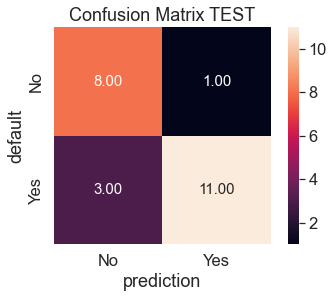

In [166]:
cm = confusion_matrix(Y_test, test_predictions)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.3 Curva precision e recall </h4>
</div>

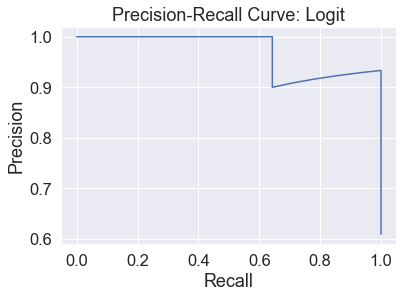

Precision:  0.6363636363636364
Recall:  1.0
f1-score:  0.8461538461538461


In [167]:
precision, recall, thresholds = precision_recall_curve(Y_test, test_prob_predictions)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, test_predictions))

<div style="background-color: white; width: 93%; padding: 2em 2em 0.2em 2em; font-family: Gill Sans, sans-serif;">
    <h4 style="color: black;"> 4.2 Curva ROC e AUC </h4>
</div>

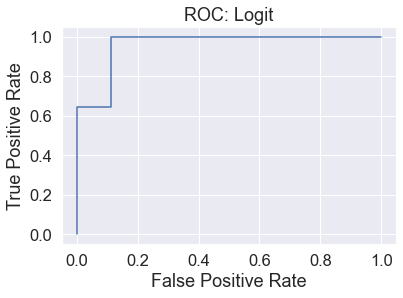

AUC:  0.8373015873015871


In [169]:
fpr, tpr, thresholds = roc_curve(Y_test, test_prob_predictions)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, test_predictions))

<div style="background-color: white; border-bottom-left-radius:15px; border-bottom-right-radius:15px; width:93%; padding:2em 2em 0.2em 2em; font-family:Gill Sans, sans-serif;">
</div>